In [1]:
%matplotlib notebook

In [2]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import scipy.stats as st
import os

In [3]:
population_csv = 'clean_data/population_df.csv'
population_df = pd.read_csv(population_csv)
population_df

,Country Name,Female - 2018,Male - 2018,Total - 2018
0,Brazil,106473081,102996239,209469320
1,Argentina,22797803,21696699,44494502
2,Colombia,25290276,24370780,49661056
3,United States,165118706,161719493,326838199
4,UK,33652378,32807966,66460344
5,UAE,2950609,6680357,9630966
6,Turkey,41728157,40611933,82340090
7,Norway,2630707,2681209,5311916
8,Greece,5464776,5268106,10732882
9,India,649586703,703055580,1352642283


In [4]:
column_1 = population_df["Female - 2018"]

column_2 = population_df["Male - 2018"]

correlation = column_1.corr(column_2)

print(correlation)

0.9997201070038135


<IPython.core.display.Javascript object>


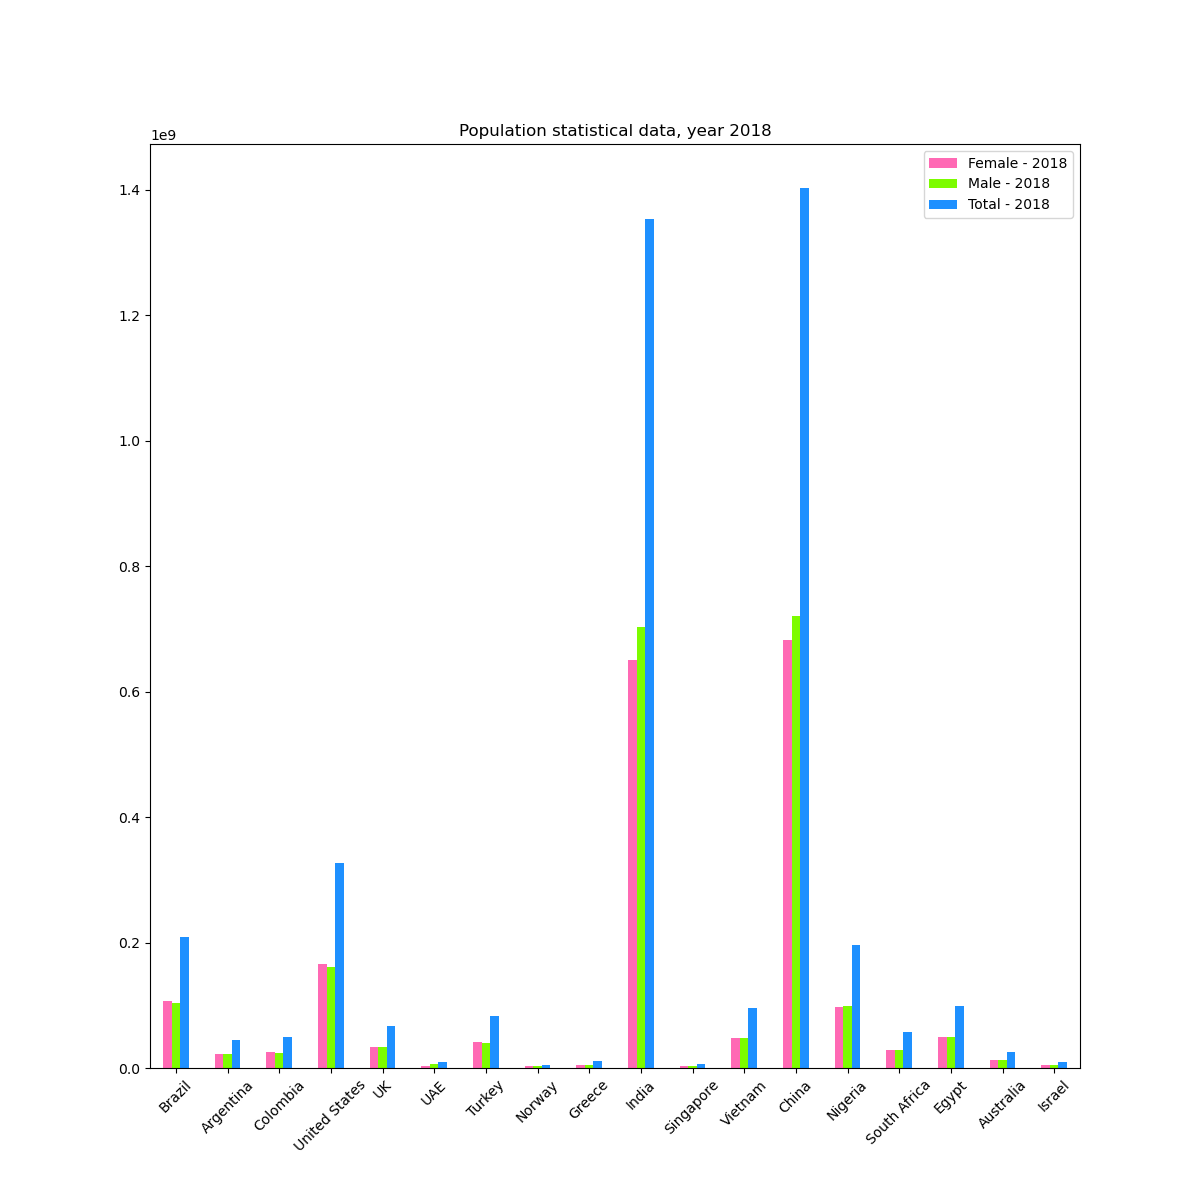

[Text(0, 0, 'Brazil'),
 Text(1, 0, 'Argentina'),
 Text(2, 0, 'Colombia'),
 Text(3, 0, 'United States'),
 Text(4, 0, 'UK'),
 Text(5, 0, 'UAE'),
 Text(6, 0, 'Turkey'),
 Text(7, 0, 'Norway'),
 Text(8, 0, 'Greece'),
 Text(9, 0, 'India'),
 Text(10, 0, 'Singapore'),
 Text(11, 0, 'Vietnam'),
 Text(12, 0, 'China'),
 Text(13, 0, 'Nigeria'),
 Text(14, 0, 'South Africa'),
 Text(15, 0, 'Egypt'),
 Text(16, 0, 'Australia'),
 Text(17, 0, 'Israel')]

In [5]:
# Set x axis and tick locations
x_axis = population_df["Country Name"]
tick_locations = [value for value in x_axis]

colors = ["hotpink", "lawngreen", "dodgerblue"]
color = colors

# Create a list indicating where to write x labels and set figure size to adjust for space

multi_plot = population_df.plot(kind="bar", figsize=(12,12), title="Population statistical data, year 2018", color=color)
multi_plot.set_xticklabels(population_df["Country Name"], rotation=45)

In [6]:
population_gender = population_df.drop(labels='Total - 2018', axis=1)
population_gender

,Country Name,Female - 2018,Male - 2018
0,Brazil,106473081,102996239
1,Argentina,22797803,21696699
2,Colombia,25290276,24370780
3,United States,165118706,161719493
4,UK,33652378,32807966
5,UAE,2950609,6680357
6,Turkey,41728157,40611933
7,Norway,2630707,2681209
8,Greece,5464776,5268106
9,India,649586703,703055580


<IPython.core.display.Javascript object>


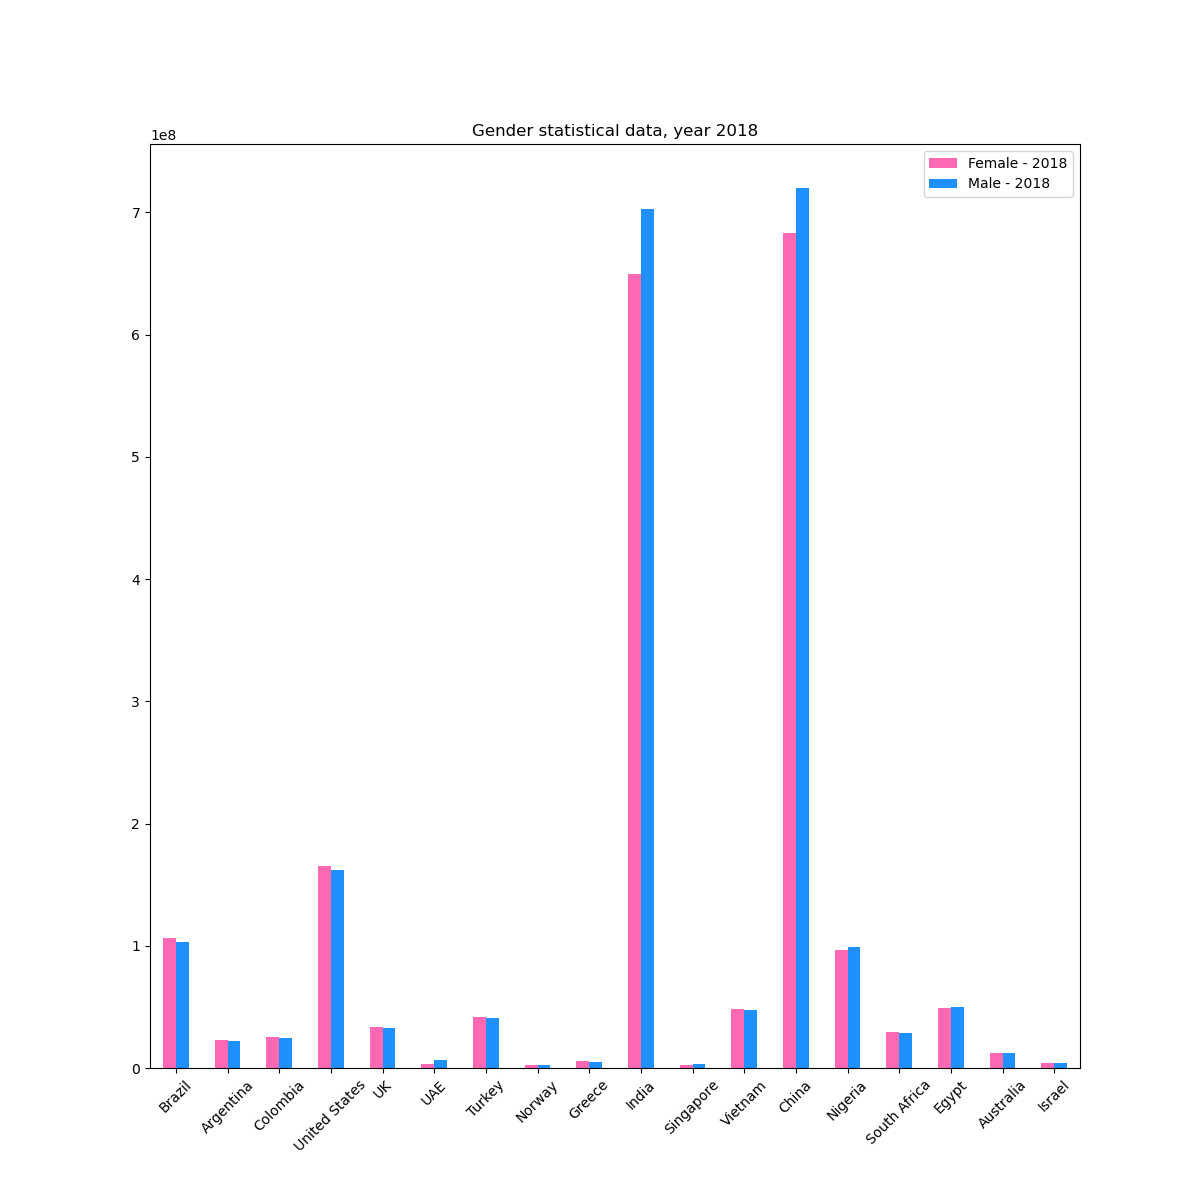

In [7]:
# Set x axis and tick locations
x_axis = population_gender["Country Name"]
tick_locations = [value for value in x_axis]

colors = ["hotpink", "dodgerblue"]
color = colors

# Create a list indicating where to write x labels and set figure size to adjust for space

multi_plot = population_gender.plot(kind="bar", figsize=(12,12), title="Gender statistical data, year 2018", color=color)
multi_plot.set_xticklabels(population_gender["Country Name"], rotation=45)

plt.savefig('new Gender statistical data, year 2018')
plt.show()

In [8]:
population_total_data = population_df.drop(labels='Female - 2018', axis=1)
population_total_df = population_total_data.drop(labels='Male - 2018', axis=1)
population_total_df 

,Country Name,Total - 2018
0,Brazil,209469320
1,Argentina,44494502
2,Colombia,49661056
3,United States,326838199
4,UK,66460344
5,UAE,9630966
6,Turkey,82340090
7,Norway,5311916
8,Greece,10732882
9,India,1352642283


In [9]:
population_total_df['log(total)'] = np.log10(population_total_df['Total - 2018'])
population_df_total = round(population_total_df,2)
population_df_total

,Country Name,Total - 2018,log(total)
0,Brazil,209469320,8.32
1,Argentina,44494502,7.65
2,Colombia,49661056,7.70
3,United States,326838199,8.51
4,UK,66460344,7.82
5,UAE,9630966,6.98
6,Turkey,82340090,7.92
7,Norway,5311916,6.73
8,Greece,10732882,7.03
9,India,1352642283,9.13


In [10]:
population_log = population_df_total.drop(labels='Total - 2018', axis=1)
population_log

,Country Name,log(total)
0,Brazil,8.32
1,Argentina,7.65
2,Colombia,7.70
3,United States,8.51
4,UK,7.82
5,UAE,6.98
6,Turkey,7.92
7,Norway,6.73
8,Greece,7.03
9,India,9.13


In [11]:
population_total = population_total_df.rename(columns={'Total - 2018': 'population_total'})
population_total

,Country Name,population_total,log(total)
0,Brazil,209469320,8.321120
1,Argentina,44494502,7.648306
2,Colombia,49661056,7.696016
3,United States,326838199,8.514333
4,UK,66460344,7.822563
5,UAE,9630966,6.983670
6,Turkey,82340090,7.915611
7,Norway,5311916,6.725251
8,Greece,10732882,7.030716
9,India,1352642283,9.131183


In [12]:
unemployment_csv = 'clean_data/unemployment_df.csv'
unemployment_df = pd.read_csv(unemployment_csv)
unemployment_df

,Country Name,Female - 2018,Male - 2018,Total - 2018
0,Brazil,14.23,10.87,12.33
1,Argentina,10.54,8.23,9.22
2,Colombia,11.79,7.09,9.11
3,US,3.84,3.95,3.90
4,UK,3.94,4.05,4.00
5,UAE,6.19,1.39,2.23
6,Turkey,13.74,9.49,10.89
7,Norway,3.54,4.03,3.80
8,Greece,24.29,15.41,19.29
9,India,5.30,5.34,5.33


In [15]:
unemployment_df_data = unemployment_df.drop(labels='Female - 2018', axis=1)
unemployment_df_data = unemployment_df_data.drop(labels='Male - 2018', axis=1)
unemployment_df_data

,Country Name,Total - 2018
0,Brazil,12.33
1,Argentina,9.22
2,Colombia,9.11
3,US,3.90
4,UK,4.00
5,UAE,2.23
6,Turkey,10.89
7,Norway,3.80
8,Greece,19.29
9,India,5.33


In [16]:
unemployment_total = unemployment_df_data.rename(columns={'Total - 2018': 'UE'})
unemployment_total

,Country Name,UE
0,Brazil,12.33
1,Argentina,9.22
2,Colombia,9.11
3,US,3.90
4,UK,4.00
5,UAE,2.23
6,Turkey,10.89
7,Norway,3.80
8,Greece,19.29
9,India,5.33


In [17]:
#Combine the data into a single dataset
population_UE_log = pd.merge(left=population_log, right=unemployment_total, left_on='Country Name', right_on='Country Name')
#population_UE_total = pd.merge(population_total.csv, unemployment_csv, how="left", on=["Country Name", "Country Name"]), population_total.csv, how="left", on=["Country Name", "Country Name"])
population_UE_log

,Country Name,log(total),UE
0,Brazil,8.32,12.33
1,Argentina,7.65,9.22
2,Colombia,7.70,9.11
3,UK,7.82,4.00
4,UAE,6.98,2.23
5,Turkey,7.92,10.89
6,Norway,6.73,3.80
7,Greece,7.03,19.29
8,India,9.13,5.33
9,Singapore,6.75,3.65


In [18]:
column_1 = population_UE_log["log(total)"]

column_2 = population_UE_log["UE"]

correlation = column_1.corr(column_2)

print(correlation)

0.026876273774762517


<IPython.core.display.Javascript object>


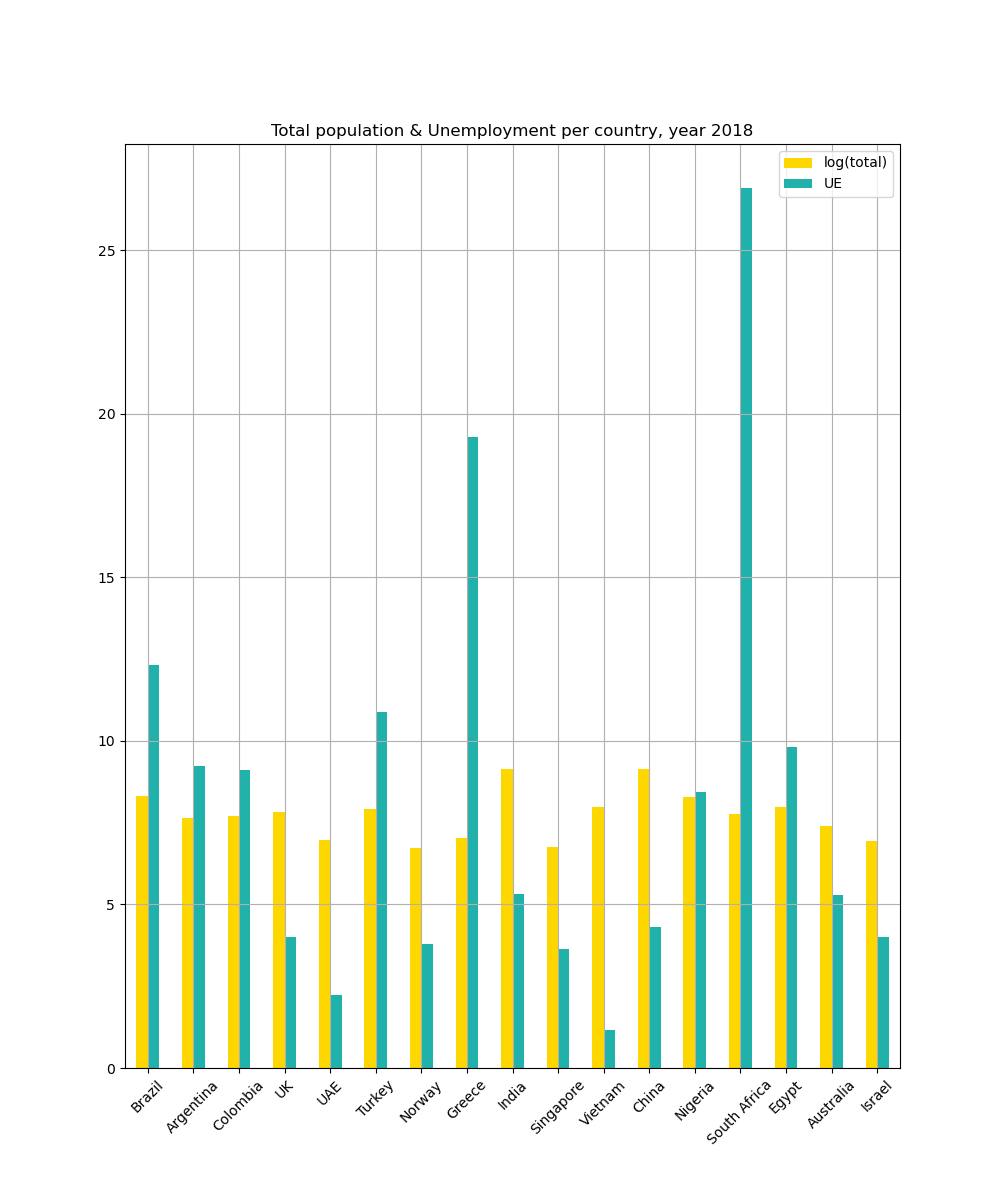

In [22]:
#multi_plot.title('Unemployment gender differences per country(%)', color="chartreuse")

# Set x axis and tick locations
x_axis = population_UE_log["Country Name"]
tick_locations = [value for value in x_axis]

color = ["gold", "lightseagreen"]

# Create a list indicating where to write x labels and set figure size to adjust for space
multi_plot = population_UE_log.plot(kind="bar", figsize=(10,12), color=color, title = "Total population & Unemployment per country, year 2018")
multi_plot.set_xticklabels(population_UE_log["Country Name"], rotation=45)
  
# Setting the background color of the plot 
# using set_facecolor() method
plt.grid()